In [13]:
import ipywidgets as widgets

import matplotlib.pyplot as plt
import numpy as np
import pyaudio

/anaconda3/envs/machine_learning_repo_env/lib/python3.6/site-packages/ipykernel_launcher.py:22: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead


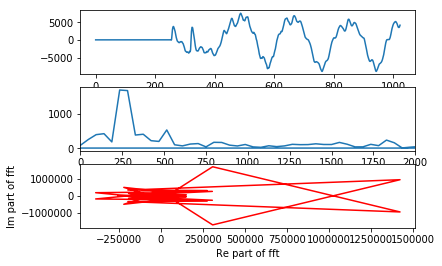

finished recording


In [49]:
chunk = 1024
FORMAT = pyaudio.paInt16
CHANNELS = 1
RATE = 48000
RECORD_SECONDS = 2
WAVE_OUTPUT_FILENAME = "output.wav"

audio = pyaudio.PyAudio()

stream = audio.open(format = FORMAT,
                channels = CHANNELS,
                rate = RATE,
                input = True,
                frames_per_buffer = chunk)

stream.start_stream()

fig, ax = plt.subplots(3, 1)
for i in range(0, int(RATE / chunk * RECORD_SECONDS)) :
    raw_data = stream.read(chunk, exception_on_overflow=False)
    audio_data = np.fromstring(raw_data, np.int16)
    
    ax[0].plot(np.arange(len(audio_data)), audio_data)
    Y = np.fft.fft(audio_data, n=chunk) # fft computing and normalization
    frq = np.fft.fftfreq(len(Y), d=1/RATE)
    ax[1].plot(frq, np.abs(Y)/len(Y))
    ax[1].set_xlabel('Freq (Hz)')
    ax[1].set_xlim(-0,2000)
    
    ax[2].plot(Y.real, Y.imag, color='red')
    ax[2].set_xlabel('Re part of fft')
    ax[2].set_ylabel('Im part of fft')
    plt.pause(0.05)


#py.iplot_mpl(fig)
print("finished recording")
stream.stop_stream()
stream.close()
audio.terminate()

In [48]:
s=[0.,1.3066,0.,0.5412,-2.,0.5412,0.,1.3066,0.,-1.3066,0.,-0.5412,2.,-0.5412,0.,-1.3066,-0.,1.3066,0.,0.5412,-2.,0.5412,0.,1.3066,0.,-1.3066,0.,-0.5412,2.,-0.5412,0.,-1.3066,-0.,1.3066,0.,0.5412,-2.,0.5412,0.,1.3066,0.,-1.3066,0.,-0.5412,2.,-0.5412,0.,-1.3066]

In [ ]:

@widgets.interact(sample_rate=(-16.,1000), 
                  s=widgets.fixed(s), 
                  fpoints=widgets.IntSlider(min=48, max=1000, value=48))
def plot_toy(sample_rate=150.0, s=s, fpoints=1000):
    N = len(s)
    
    t = np.arange(0,N) # time vector, currently independent of sample rate    
       
    Y = np.fft.fft(s, n=fpoints) # fft computing and normalization
    frq = np.fft.fftfreq(len(Y), 1/sample_rate)
    fig, ax = plt.subplots(3, 1, figsize=(10, 8))
    ax[0].plot(t,s, label='signal')
    ax[0].set_ylabel('Amplitude')
    ax[0].set_xlabel("Discrete Time")
    
    ax[1].plot(frq,np.abs(Y), label='') # plotting the spectrum
    ax[1].plot(frq, Y.real, label='Re part of fft')
    ax[1].plot(frq, Y.imag, label='Im part of fft')

    ax[1].set_xlabel('Freq (Hz)')
    ax[1].set_ylabel('|Y(freq)|')
    ax[2].plot(Y.real, Y.imag, color='red')
    ax[2].set_xlabel('Re part of fft')
    ax[2].set_ylabel('Im part of fft')
    
